<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#EDA-and-Data-Cleaning" data-toc-modified-id="EDA-and-Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA and Data Cleaning</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span></li></ul></div>

# Libraries

In [1]:
import pandas 
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Load Data

In [2]:
data = pandas.read_csv('../data/laptop_price.csv',encoding='latin-1')

In [3]:
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# EDA and Data Cleaning

In [44]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [6]:
data['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [7]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [8]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [9]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [10]:
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [11]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [12]:
data_sub = data.copy()

In [37]:
data_sub.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [13]:
data_sub.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [14]:
data_sub = data_sub[['Company','Cpu','Ram','Memory','Gpu','OpSys', 'Weight','Price_euros']]

In [15]:
data_sub

,Company,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...
1298,Lenovo,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [43]:
jml_laptop = data_sub["Company"].value_counts()
fig = px.bar(jml_laptop,
            x=jml_laptop.index,
            y=jml_laptop.values,
            template="plotly_dark",
            color=jml_laptop.values,
            labels=dict(index="Brand", y="Total Appears", color="Total Appears"),
            title="Dell become the product with the highest values where it appears 297 times...")
fig.show()

In [18]:
data_sub['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [40]:
fig = px.pie(data_sub,
            values=data_sub['OpSys'].value_counts().values,
            names=data_sub['OpSys'].value_counts().index,
            title="Most laptops use Windows 10 as its operating system")
fig.show()

In [45]:
data_sub = data_sub[(data_sub['OpSys']!="No OS") &
                   (data_sub['OpSys']!="Android")]

In [46]:
data_sub['OpSys'].unique()

array(['macOS', 'Windows 10', 'Mac OS X', 'Linux', 'Windows 10 S',
       'Chrome OS', 'Windows 7'], dtype=object)

In [47]:
data_sub['OpSys'] = data_sub['OpSys'].map({'macOS':'MacOS', 
                                           'Windows 10':'Windows', 
                                           'Mac OS X':'MacOS', 
                                           'Linux':'Linux', 
                                           'Windows 10 S':'Windows',
                                           'Chrome OS':'Chrome', 
                                           'Windows 7':'Windows'})

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
data_sub['OpSys'].unique()

array(['MacOS', 'Windows', 'Linux', 'Chrome'], dtype=object)

In [49]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1235 non-null   object 
 1   Cpu          1235 non-null   object 
 2   Ram          1235 non-null   object 
 3   Memory       1235 non-null   object 
 4   Gpu          1235 non-null   object 
 5   OpSys        1235 non-null   object 
 6   Weight       1235 non-null   object 
 7   Price_euros  1235 non-null   float64
dtypes: float64(1), object(7)
memory usage: 86.8+ KB


In [50]:
himpunan_ram = []
for i in data_sub['Ram']:
    teks = i.strip("GB")
    himpunan_ram.append(int(teks))

In [51]:
data_sub['Ram'] = himpunan_ram

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
data_sub

,Company,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,MacOS,1.37kg,1339.69
1,Apple,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,MacOS,1.34kg,898.94
3,Apple,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,MacOS,1.83kg,2537.45
4,Apple,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,MacOS,1.37kg,1803.60
5,Acer,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows,2.1kg,400.00
...,...,...,...,...,...,...,...,...
1298,Lenovo,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows,1.8kg,638.00
1299,Lenovo,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows,1.3kg,1499.00
1300,Lenovo,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows,1.5kg,229.00
1301,HP,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows,2.19kg,764.00


In [53]:
data_sub['Weight'] = data_sub['Weight'].str.replace("kg","")

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
data_sub["Weight"] = data_sub["Weight"].astype('float32') 

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1235 non-null   object 
 1   Cpu          1235 non-null   object 
 2   Ram          1235 non-null   int64  
 3   Memory       1235 non-null   object 
 4   Gpu          1235 non-null   object 
 5   OpSys        1235 non-null   object 
 6   Weight       1235 non-null   float32
 7   Price_euros  1235 non-null   float64
dtypes: float32(1), float64(1), int64(1), object(5)
memory usage: 82.0+ KB


In [56]:
data_sub[data_sub['Cpu']=="Samsung Cortex A72&A53 2.0GHz"]

,Company,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1191,Samsung,Samsung Cortex A72&A53 2.0GHz,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome,1.15,659.0


In [57]:
data_sub = data_sub.drop(index=1191,axis=0)

In [58]:
data_sub["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i7 2.7GHz', 'Intel Core i5 3.1GHz',
       'AMD A9-Series 9420 3GHz', 'Intel Core i7 2.2GHz',
       'Intel Core i7 8550U 1.8GHz', 'Intel Core i5 8250U 1.6GHz',
       'Intel Core i7 2.8GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core M m3 1.2GHz', 'Intel Core i7 7500U 2.7GHz',
       'Intel Core i7 2.9GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i5 7200U 2.5GHz',
       'Intel Core i7 7700HQ 2.8GHz', 'Intel Core i5 2.0GHz',
       'AMD Ryzen 1700 3GHz', 'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Core i3 7100U 2.4GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', 'A

In [59]:
himpunan_cpu = []
for i in data_sub['Cpu']:
    if 'Intel Core i3' in i:
        himpunan_cpu.append('Intel Core I3')
    elif 'Intel Core i5' in i:
        himpunan_cpu.append('Intel Core I5')
    elif 'Intel Core i7' in i:
        himpunan_cpu.append('Intel Core I7')
    elif 'AMD' in i:
        himpunan_cpu.append('AMD')
    else:
        himpunan_cpu.append('Other Intel Types')

In [60]:
himpunan_cpu

['Intel Core I5',
 'Intel Core I5',
 'Intel Core I7',
 'Intel Core I5',
 'AMD',
 'Intel Core I7',
 'Intel Core I5',
 'Intel Core I7',
 'Intel Core I5',
 'Intel Core I7',
 'Intel Core I3',
 'Other Intel Types',
 'Intel Core I5',
 'Intel Core I7',
 'Intel Core I7',
 'Intel Core I5',
 'Other Intel Types',
 'Intel Core I5',
 'Intel Core I5',
 'Intel Core I7',
 'Intel Core I3',
 'Intel Core I5',
 'Intel Core I5',
 'Intel Core I7',
 'Intel Core I5',
 'Other Intel Types',
 'AMD',
 'AMD',
 'Intel Core I7',
 'Intel Core I5',
 'Other Intel Types',
 'Intel Core I3',
 'Intel Core I5',
 'Intel Core I5',
 'Intel Core I5',
 'Intel Core I3',
 'Intel Core I7',
 'Intel Core I5',
 'Intel Core I5',
 'Intel Core I5',
 'Intel Core I5',
 'AMD',
 'Intel Core I5',
 'Other Intel Types',
 'Intel Core I7',
 'AMD',
 'Intel Core I7',
 'Intel Core I3',
 'Intel Core I7',
 'Intel Core I3',
 'Intel Core I5',
 'Intel Core I7',
 'Intel Core I3',
 'Intel Core I7',
 'Intel Core I5',
 'Intel Core I5',
 'Intel Core I5',
 'In

In [61]:
data_sub['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
5                    AMD A9-Series 9420 3GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1234, dtype: object

In [62]:
data_sub['Cpu'] = himpunan_cpu

In [63]:
data_sub['Cpu'].tail()

1298        Intel Core I7
1299        Intel Core I7
1300    Other Intel Types
1301        Intel Core I7
1302    Other Intel Types
Name: Cpu, dtype: object

In [64]:
data_sub['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'AMD Radeon Pro 455', 'Intel Iris Plus Graphics 650',
       'AMD Radeon R5', 'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'AMD Radeon Pro 555',
       'AMD Radeon R5 M430', 'Intel HD Graphics 615',
       'AMD Radeon Pro 560', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'Intel HD Graphics 620',
       'Intel HD Graphics 520', 'AMD Radeon 530', 'Nvidia GeForce 930MX',
       'Intel HD Graphics', 'AMD Radeon R2', 'Intel HD Graphics 500',
       'Nvidia GeForce 930MX ', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 940MX', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [65]:
himpunan_gpu=[]
for i in data_sub['Gpu']:
    if 'AMD' in i:
        himpunan_gpu.append("AMD")
    elif 'Intel' in i:
        himpunan_gpu.append("Intel")
    elif 'Nvidia' in i:
        himpunan_gpu.append("Nvidia")

In [66]:
data_sub['Gpu'] = himpunan_gpu

In [67]:
data_sub['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '512GB SSD', '256GB SSD',
       '500GB HDD', '256GB Flash Storage', '32GB Flash Storage',
       '128GB SSD +  1TB HDD', '1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '64GB SSD', '1.0TB Hybrid',
       '2TB HDD', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [68]:
data_sub['Memory'] = data_sub['Memory'].astype(str).replace('.0', '', regex=True)
data_sub["Memory"] = data_sub["Memory"].str.replace('GB', '')
data_sub["Memory"] = data_sub["Memory"].str.replace('TB', '000')
new = data_sub["Memory"].str.split("+", n = 1, expand = True)
data_sub["first"]= new[0]
data_sub["first"]=data_sub["first"].str.strip()
data_sub["second"]= new[1]
data_sub["Layer1HDD"] = data_sub["first"].apply(lambda x: 1 if "HDD" in x else 0)
data_sub["Layer1SSD"] = data_sub["first"].apply(lambda x: 1 if "SSD" in x else 0)
data_sub["Layer1Hybrid"] = data_sub["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data_sub["Layer1Flash_Storage"] = data_sub["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
data_sub["second"].fillna("0", inplace = True)
data_sub["Layer2HDD"] = data_sub["second"].apply(lambda x: 1 if "HDD" in x else 0)
data_sub["Layer2SSD"] = data_sub["second"].apply(lambda x: 1 if "SSD" in x else 0)
data_sub["Layer2Hybrid"] = data_sub["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data_sub["Layer2Flash_Storage"] = data_sub["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
data_sub["Layer2HDD"] = data_sub["second"].apply(lambda x: 1 if "HDD" in x else 0)
data_sub["Layer2SSD"] = data_sub["second"].apply(lambda x: 1 if "SSD" in x else 0)
data_sub["Layer2Hybrid"] = data_sub["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data_sub["Layer2Flash_Storage"] = data_sub["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [69]:
data_sub['first'] = data_sub['first'].str.replace('SSD','')
data_sub['first'] = data_sub['first'].str.replace('Flash Storage','')
data_sub['first'] = data_sub['first'].str.replace('HDD','')
data_sub['first'] = data_sub['first'].str.replace('Hybrid','')
data_sub['first'] = data_sub['first'].str.replace(" ","")
data_sub['second'] = data_sub['second'].str.replace('HDD', '')
data_sub['second'] = data_sub['second'].str.replace('SSD', '')
data_sub['second'] = data_sub['second'].str.replace('Hybrid','')
data_sub['second'] = data_sub['second'].str.replace(" ","")

In [70]:
data_sub

,Company,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Intel Core I5,8,128 SSD,Intel,MacOS,1.37,1339.69,128,0,0,1,0,0,0,0,0,0
1,Apple,Intel Core I5,8,128 Flash Storage,Intel,MacOS,1.34,898.94,128,0,0,0,0,1,0,0,0,0
3,Apple,Intel Core I7,16,512 SSD,AMD,MacOS,1.83,2537.45,512,0,0,1,0,0,0,0,0,0
4,Apple,Intel Core I5,8,256 SSD,Intel,MacOS,1.37,1803.60,256,0,0,1,0,0,0,0,0,0
5,Acer,AMD,4,0 HDD,AMD,Windows,2.10,400.00,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Intel Core I7,4,128 SSD,Intel,Windows,1.80,638.00,128,0,0,1,0,0,0,0,0,0
1299,Lenovo,Intel Core I7,16,512 SSD,Intel,Windows,1.30,1499.00,512,0,0,1,0,0,0,0,0,0
1300,Lenovo,Other Intel Types,2,64 Flash Storage,Intel,Windows,1.50,229.00,64,0,0,0,0,1,0,0,0,0
1301,HP,Intel Core I7,6,1000 HDD,AMD,Windows,2.19,764.00,1000,0,1,0,0,0,0,0,0,0


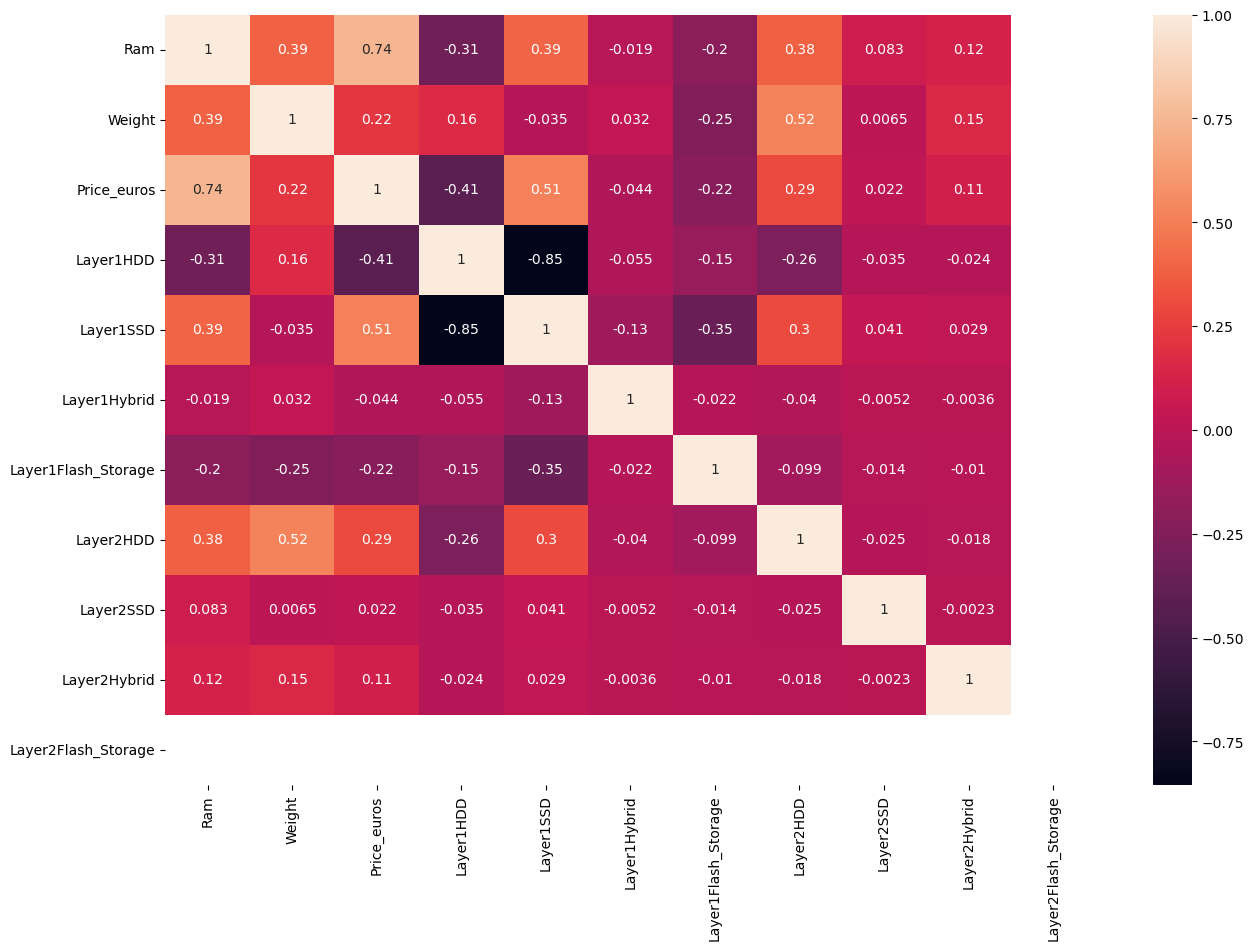

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data_sub.corr(), annot=True,ax=ax) 
plt.show()


In [74]:
data_sub["first"] = data_sub["first"].astype(int)
data_sub["second"] = data_sub["second"].astype(int)
data_sub["HDD"]=(data_sub["first"]*data_sub["Layer1HDD"]+data_sub["second"]*data_sub["Layer2HDD"])
data_sub["SSD"]=(data_sub["first"]*data_sub["Layer1SSD"]+data_sub["second"]*data_sub["Layer2SSD"])
data_sub["Hybrid"]=(data_sub["first"]*data_sub["Layer1Hybrid"]+data_sub["second"]*data_sub["Layer2Hybrid"])
data_sub["Flash_Storage"]=(data_sub["first"]*data_sub["Layer1Flash_Storage"]+data_sub["second"]*data_sub["Layer2Flash_Storage"])
data_sub.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [75]:
data_sub

,Company,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Intel Core I5,8,128 SSD,Intel,MacOS,1.37,1339.69,0,128,0,0
1,Apple,Intel Core I5,8,128 Flash Storage,Intel,MacOS,1.34,898.94,0,0,0,128
3,Apple,Intel Core I7,16,512 SSD,AMD,MacOS,1.83,2537.45,0,512,0,0
4,Apple,Intel Core I5,8,256 SSD,Intel,MacOS,1.37,1803.60,0,256,0,0
5,Acer,AMD,4,0 HDD,AMD,Windows,2.10,400.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Intel Core I7,4,128 SSD,Intel,Windows,1.80,638.00,0,128,0,0
1299,Lenovo,Intel Core I7,16,512 SSD,Intel,Windows,1.30,1499.00,0,512,0,0
1300,Lenovo,Other Intel Types,2,64 Flash Storage,Intel,Windows,1.50,229.00,0,0,0,64
1301,HP,Intel Core I7,6,1000 HDD,AMD,Windows,2.19,764.00,1000,0,0,0


In [76]:
data_sub.drop(columns=['Hybrid','Flash_Storage','Memory'],inplace=True)

In [77]:
data_sub

,Company,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,HDD,SSD
0,Apple,Intel Core I5,8,Intel,MacOS,1.37,1339.69,0,128
1,Apple,Intel Core I5,8,Intel,MacOS,1.34,898.94,0,0
3,Apple,Intel Core I7,16,AMD,MacOS,1.83,2537.45,0,512
4,Apple,Intel Core I5,8,Intel,MacOS,1.37,1803.60,0,256
5,Acer,AMD,4,AMD,Windows,2.10,400.00,0,0
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Intel Core I7,4,Intel,Windows,1.80,638.00,0,128
1299,Lenovo,Intel Core I7,16,Intel,Windows,1.30,1499.00,0,512
1300,Lenovo,Other Intel Types,2,Intel,Windows,1.50,229.00,0,0
1301,HP,Intel Core I7,6,AMD,Windows,2.19,764.00,1000,0


In [78]:
data_sub

,Company,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,HDD,SSD
0,Apple,Intel Core I5,8,Intel,MacOS,1.37,1339.69,0,128
1,Apple,Intel Core I5,8,Intel,MacOS,1.34,898.94,0,0
3,Apple,Intel Core I7,16,AMD,MacOS,1.83,2537.45,0,512
4,Apple,Intel Core I5,8,Intel,MacOS,1.37,1803.60,0,256
5,Acer,AMD,4,AMD,Windows,2.10,400.00,0,0
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Intel Core I7,4,Intel,Windows,1.80,638.00,0,128
1299,Lenovo,Intel Core I7,16,Intel,Windows,1.30,1499.00,0,512
1300,Lenovo,Other Intel Types,2,Intel,Windows,1.50,229.00,0,0
1301,HP,Intel Core I7,6,AMD,Windows,2.19,764.00,1000,0


In [79]:
data_sub.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ram,1234.0,8.497569,5.157259,2.00,4.0000,8.00,8.0,64.0
Weight,1234.0,2.033695,0.674792,0.69,1.4900,2.04,2.3,4.7
Price_euros,1234.0,1153.833801,703.326365,174.00,638.8475,999.00,1499.0,6099.0
HDD,1234.0,352.641815,523.232975,0.00,0.0000,0.00,1000.0,2000.0
SSD,1234.0,188.524311,188.581932,0.00,0.0000,256.00,256.0,1024.0


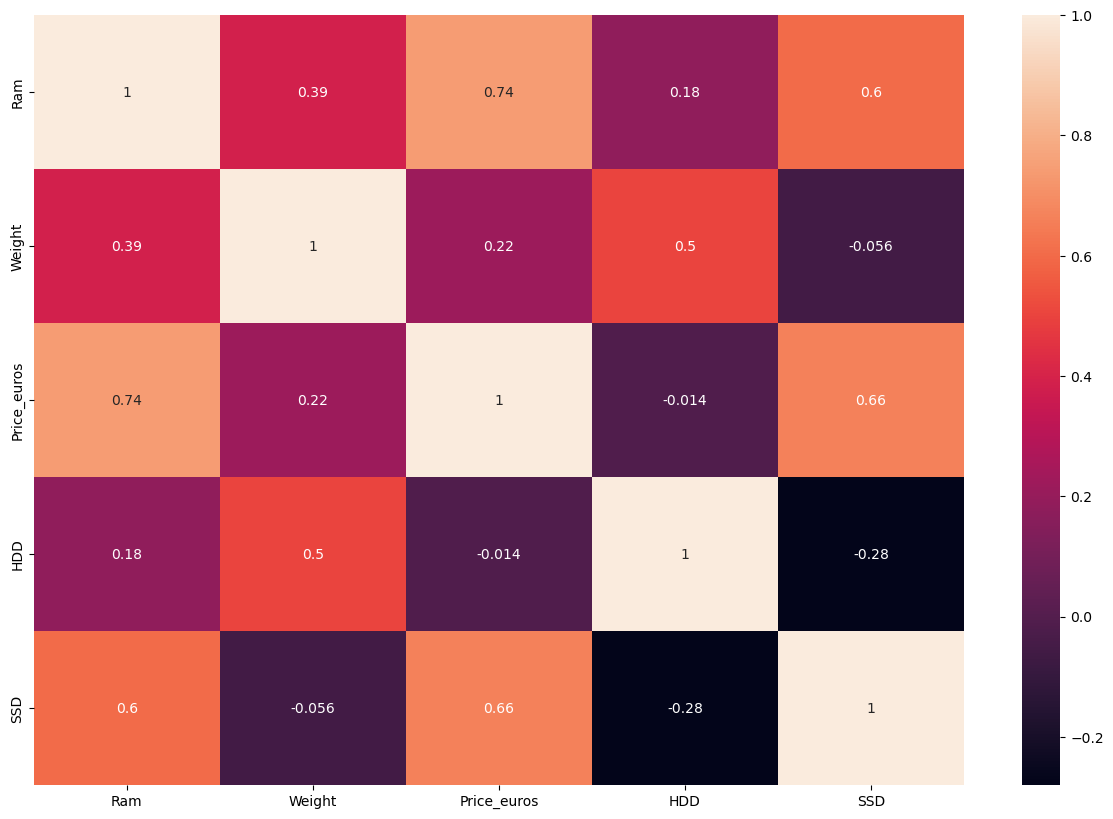

In [80]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data_sub.corr(), annot=True,ax=ax) 
plt.show()

In [52]:
data_sub

,Company,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,HDD,SSD
0,Apple,Intel Core I5,8,Intel,MacOS,1.37,1339.69,0,128
1,Apple,Intel Core I5,8,Intel,MacOS,1.34,898.94,0,0
3,Apple,Intel Core I7,16,AMD,MacOS,1.83,2537.45,0,512
4,Apple,Intel Core I5,8,Intel,MacOS,1.37,1803.60,0,256
5,Acer,AMD,4,AMD,Windows,2.10,400.00,0,0
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Intel Core I7,4,Intel,Windows,1.80,638.00,0,128
1299,Lenovo,Intel Core I7,16,Intel,Windows,1.30,1499.00,0,512
1300,Lenovo,Other Intel Types,2,Intel,Windows,1.50,229.00,0,0
1301,HP,Intel Core I7,6,AMD,Windows,2.19,764.00,1000,0


C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




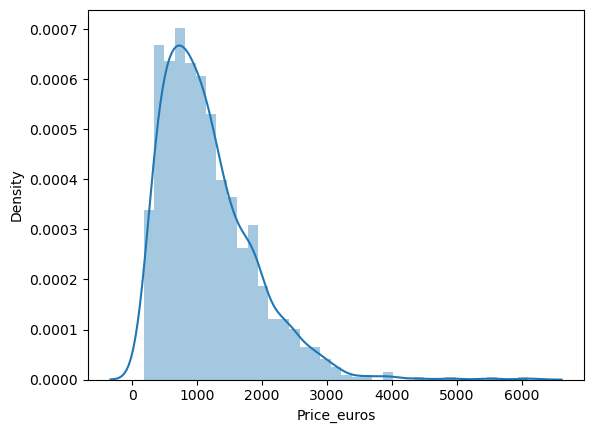

In [53]:
sns.distplot(data_sub.Price_euros)
plt.show()

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




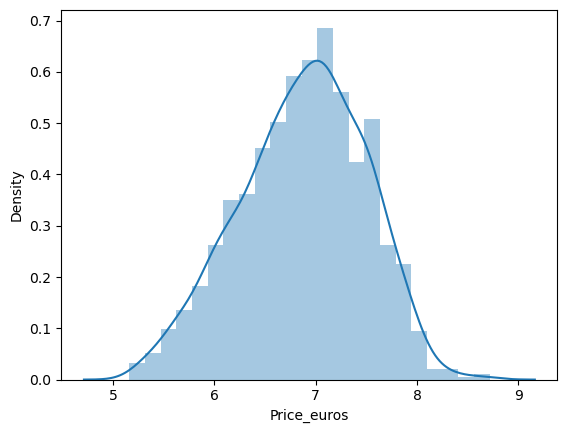

In [54]:
sns.distplot(numpy.log(data_sub.Price_euros))
plt.show()

# Modelling

In [55]:
from sklearn.model_selection import train_test_split
# Untuk split data
from sklearn.compose import ColumnTransformer
# Untuk menerapakan transformer ke setiap kolom
from sklearn.pipeline import Pipeline 
# Untuk merangkai beberapa langkah yang bisa digunakan untuk cross-validasi sambil nyetting macem-macem parameter
from sklearn.preprocessing import OneHotEncoder
# Untuk mengubah fitur berkategori menjadi numeric
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [56]:
x = data_sub.drop("Price_euros", axis=1)
y = numpy.log(data_sub['Price_euros'])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=2)
# random_state : Ngendaliin pengacakan yang diterapin ke data sebelum masuk ke split

In [58]:
step_one = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4])
    ],remainder='passthrough')

In [59]:
step_one

ColumnTransformer(remainder='passthrough',
                  transformers=[('col_tnf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 [0, 1, 3, 4])])

In [60]:
step_two = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

In [61]:
step_two

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [62]:
pipe = Pipeline([

('step_one',step_one),

('step_two',step_two)

])

In [63]:
pipe

Pipeline(steps=[('step_one',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4])])),
                ('step_two',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [64]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step_one',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4])])),
                ('step_two',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [65]:
y_pred = pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8362038497506684
MAE 0.16872758970394017


In [66]:
x_test

,Company,Cpu,Ram,Gpu,OpSys,Weight,HDD,SSD
432,Lenovo,Intel Core I3,4,Intel,Windows,1.70,0,128
1284,Lenovo,Intel Core I7,4,Intel,Windows,1.80,0,128
500,Asus,Other Intel Types,4,Intel,Windows,1.20,0,0
54,Acer,Intel Core I3,4,Intel,Windows,2.40,1000,0
140,Acer,Intel Core I3,4,Nvidia,Windows,3.00,1000,0
...,...,...,...,...,...,...,...,...
634,Asus,Other Intel Types,8,Intel,Windows,2.00,1000,0
143,Toshiba,Intel Core I5,4,Intel,Windows,2.10,0,0
173,Toshiba,Intel Core I3,4,Intel,Windows,2.00,0,0
787,Lenovo,Intel Core I7,4,Nvidia,Windows,2.40,1000,0


In [67]:
a = numpy.array(['Apple','Intel Core I5', '16','Intel','MacOS','1.70','0','128'])
print(a.shape)
a = a.reshape(1,8)
print(a.shape)

(8,)
(1, 8)


In [68]:
pipe.predict(a)

C:\Users\LENOVO\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([7.50352873])

In [69]:
harga      = int(np.exp(pipe.predict(a)[0]))
harga      = harga*16204
prediction = str(harga)

C:\Users\LENOVO\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



In [70]:
print("Harga : Rp",prediction)

Harga : Rp 29394056


In [71]:
import pickle
data_sub.to_csv("data_sub.csv", index=False)
pickle.dump(pipe,open('model.pkl','wb'))